# The Spark Foundation
Task 2
Prediction using Unsupervised ML For Iris dataset

Author :Puneeth Kumar T P

In [31]:

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Data Set Information:
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

Attribute Information:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [32]:

# Load the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [33]:

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [35]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
#checking for null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

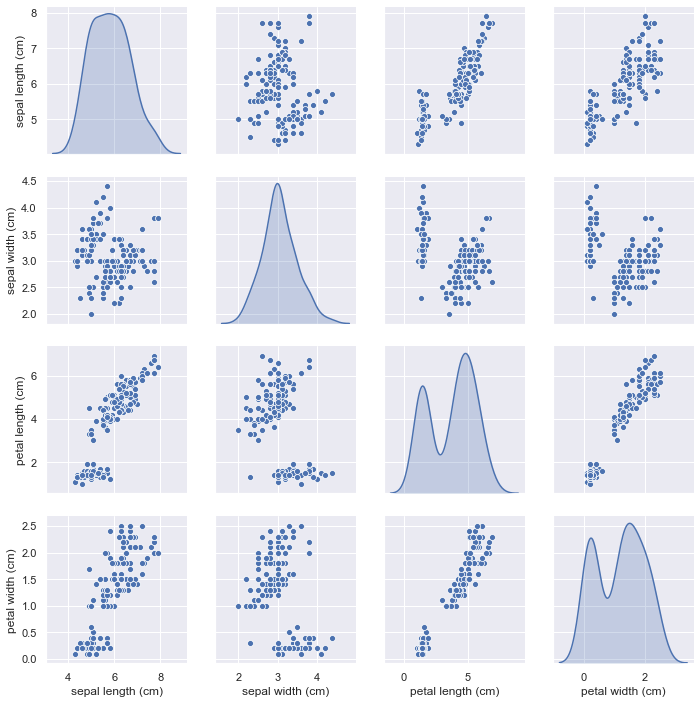

In [37]:
#plotting the pair plot to know the relations
sns.pairplot(data, diag_kind="kde")

In [38]:
#converting features in to array
X = data.values
X.shape

(150, 4)

## K-Means Clustering

In [39]:
from sklearn.cluster import KMeans

In [40]:
#hyper parameter tuning to find optimal k
Loss= []
k_values = [2,3,4,5,6,7,8,9,10]

for i in k_values:
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    model.fit(X)
    k_means=model.inertia_
    Loss.append(k_means)

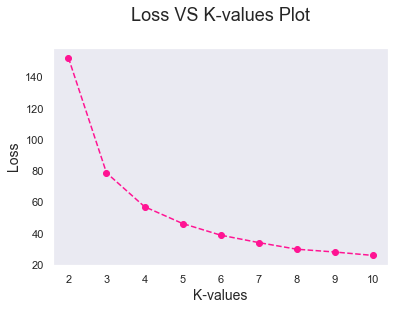

In [41]:
# Draw Loss VS K values plot
sns.set()
plt.plot(k_values, Loss,color='deeppink', marker='o', linestyle='dashed')
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

From above graph we choose the optimal clusters as 3

In [42]:

#we can see that at k=3 there is a point of inflection
k=3
model=KMeans(n_clusters=3, n_jobs=-1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
pred=model.fit_predict(X)

In [44]:
cluster1,cluster2,cluster3=[],[],[]

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(X[i])
    elif model.labels_[i] == 1:
        cluster2.append(X[i])
    else:
        cluster3.append(X[i])
        
# Number of reviews in different clusters
print("No. of Iris_flowers in Cluster_1 : ",len(cluster1))
print("\nNo. of Iris_flowers in Cluster_2 : ",len(cluster2))
print("\nNo. of Iris_flowers in Cluster_3 : ",len(cluster3))

No. of Iris_flowers in Cluster_1 :  50

No. of Iris_flowers in Cluster_2 :  62

No. of Iris_flowers in Cluster_3 :  38


In [45]:

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

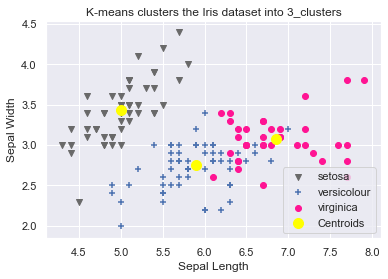

In [46]:

# Visualising the clusters - On the first two features sepal length and sepal width
sns.set()
plt.scatter(X[pred == 0, 0], X[pred == 0, 1],marker='v',c = 'dimgrey', label = 'setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1],marker='+', c = 'b', label = 'versicolour')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1],marker='o' ,c = 'deeppink', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-means clusters the Iris dataset into 3_clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

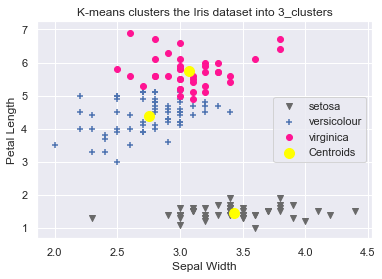

In [47]:
# Visualising the clusters - On the middle two features sepal width and petal length
plt.scatter(X[pred == 0, 1], X[pred == 0, 2],marker='v',c = 'dimgrey', label = 'setosa')
plt.scatter(X[pred == 1, 1], X[pred == 1, 2],marker='+', c = 'b', label = 'versicolour')
plt.scatter(X[pred == 2, 1], X[pred == 2, 2],marker='o' ,c = 'deeppink', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-means clusters the Iris dataset into 3_clusters')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()

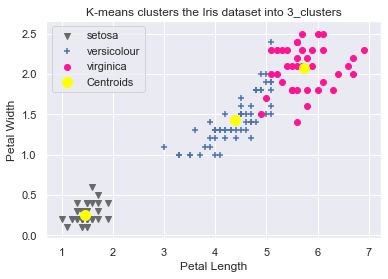

In [48]:

# Visualising the clusters - On the last two features petal length and petal width
plt.scatter(X[pred == 0, 2], X[pred == 0, 3],marker='v',c = 'dimgrey', label = 'setosa')
plt.scatter(X[pred == 1, 2], X[pred == 1, 3],marker='+', c = 'b', label = 'versicolour')
plt.scatter(X[pred == 2, 2], X[pred == 2, 3],marker='o' ,c = 'deeppink', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-means clusters the Iris dataset into 3_clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# DBSCAN Clustering¶

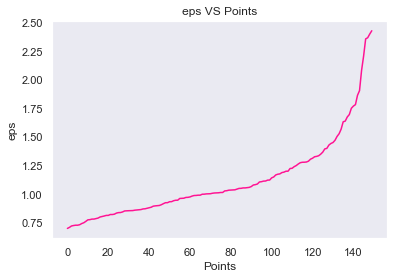

In [49]:
min_points =25
from sklearn.preprocessing import StandardScaler
data=StandardScaler().fit_transform(X)
# Computing distances of nth-nearest neighbours
distance=[]
for x in data:
    value=np.sort(np.sum((data-x)**2,axis=1),axis=None)
    distance.append(value[min_points])
final_eps=np.sqrt(np.array(distance))    

sorted_dist = np.sort(final_eps)
points = [point for point in range(len(X))]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_dist,c = 'deeppink')
plt.xlabel('Points')
plt.ylabel('eps')
plt.title('eps VS Points')
plt.grid()
plt.show()


From above graph, we can see that the optimal value of Epsilon is 1.25 because after that there is sharp rise

In [50]:

#we can see that point of inflexion is at eps=6
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.25,min_samples=5, n_jobs=-1)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [51]:

print('No of clusters: ',len(set(dbscan.labels_)))
print('Cluster are ignoring (-1 for noise ): ',set(dbscan.labels_))

No of clusters:  2
Cluster are ignoring (-1 for noise ):  {0, 1}


In [52]:
pred=dbscan.fit_predict(X)

In [53]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

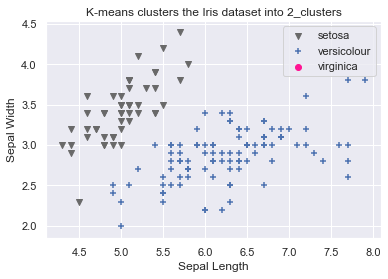

In [54]:

# Visualising the clusters - On the first two columns sepal length and sepal width
sns.set()
plt.scatter(X[pred == 0, 0], X[pred == 0, 1],marker='v',c = 'dimgrey', label = 'setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1],marker='+', c = 'b', label = 'versicolour')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1],marker='o' ,c = 'deeppink', label = 'virginica')

plt.title('K-means clusters the Iris dataset into 2_clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

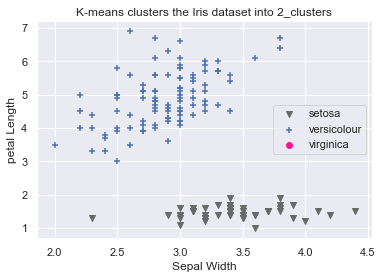

In [55]:
# Visualising the clusters - On the first two columns sepal length and sepal width
sns.set()
plt.scatter(X[pred == 0, 1], X[pred == 0, 2],marker='v',c = 'dimgrey', label = 'setosa')
plt.scatter(X[pred == 1, 1], X[pred == 1, 2],marker='+', c = 'b', label = 'versicolour')
plt.scatter(X[pred == 2, 1], X[pred == 2, 2],marker='o' ,c = 'deeppink', label = 'virginica')

plt.title('K-means clusters the Iris dataset into 2_clusters')
plt.xlabel('Sepal Width')
plt.ylabel('petal Length')
plt.legend()

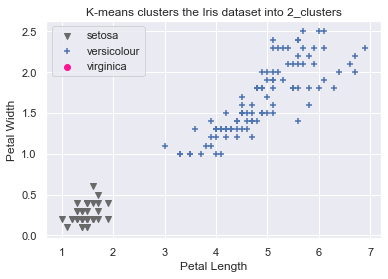

In [56]:

# Visualising the clusters - On the first two columns petal length and petal width
sns.set()
plt.scatter(X[pred == 0, 2], X[pred == 0, 3],marker='v',c = 'dimgrey', label = 'setosa')
plt.scatter(X[pred == 1, 2], X[pred == 1, 3],marker='+', c = 'b', label = 'versicolour')
plt.scatter(X[pred == 2, 2], X[pred == 2, 3],marker='o' ,c = 'deeppink', label = 'virginica')

plt.title('K-means clusters the Iris dataset into 2_clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In DBSCAN algorithm we are getting different clusters for different epsilon.

DBSCAN is a density based clustering algorithm.

Here we used epsilon = 1.25 so we got only 2 cluster.